In [1]:
!pip install -q -U keras-tuner
import keras_tuner as kt

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf

from keras.callbacks import ModelCheckpoint
from keras.datasets import fashion_mnist
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.utils import np_utils

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [14]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data() #TODO
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


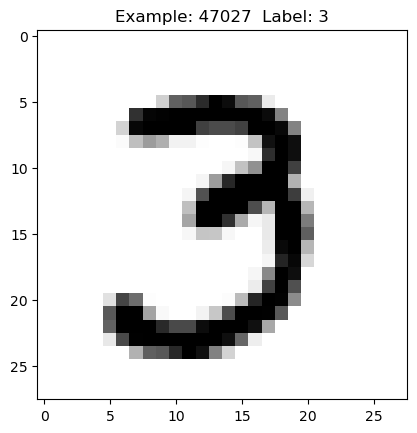

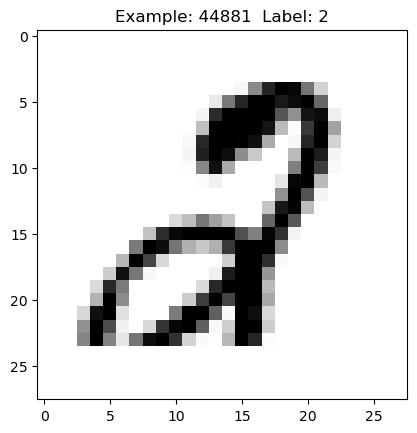

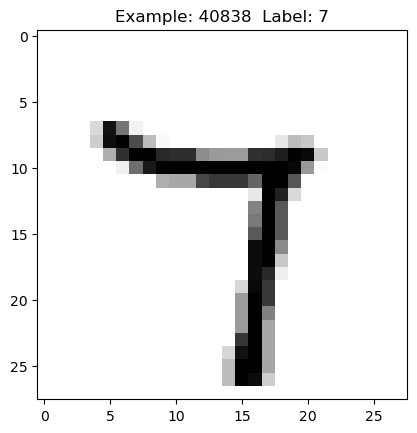

In [15]:
# Función auxiliar para visualizar datos de entrenamiento de manera aleatoria
def display_digit(num):
  # Seleccionar la imagen num de mnist.train.images y hacer un reshape al tamaño de la imagen
    image = x_train[num,:,:] 
  # Seleccionar el target num de mnist.train.labels
    label = y_train[num] 
  # Mostrar
    plt.title('Example: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

# Mostramos algunos ejemplos
display_digit(np.random.randint(0, x_train.shape[0]))
display_digit(np.random.randint(0, x_train.shape[0]))
display_digit(np.random.randint(0, x_train.shape[0]))

In [16]:
x_train, x_te = x_train.astype("float32") / 255.0, x_test.astype("float32") / 255.0 #TODO Cambio al rango 0-1 -> Disminuyo CC
y_train = to_categorical(y_train, num_classes=10) #One-hot encoding para minimizar error
print(y_train.shape)
y_te = to_categorical(y_test, num_classes=10)
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train) #TODO 3 subconjuntos es de vital importancia
print(y_tr.shape)

(60000, 10)
(45000, 10)


In [17]:
def model_builder(hp):
    #TO DO
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
  
  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
    hp_units = hp.Int('units', min_value = 32, max_value = 512, step = 32)
    model.add(Dense(units = hp_units, activation = 'relu'))
    model.add(Dense(10))

  # Tune the learning rate for the optimizer 
  # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 
  
    model.compile(optimizer = Adam(learning_rate = hp_learning_rate),
                loss = CategoricalCrossentropy(from_logits = True), 
                metrics = ['accuracy'])
  
    return model

In [18]:
# model.summary()

In [19]:
tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy', 
                     max_epochs = 10, #TODO
                     factor = 3,
                     directory = 'dir_ej11',
                     project_name = 'intro_to_kt')  

Reloading Tuner from dir_ej11\intro_to_kt\tuner0.json


In [20]:
import tensorflow as tf
import IPython

class ClearTrainingOutput(tf.keras.callbacks.Callback):
    def on_train_end(*args, **kwargs):
        IPython.display.clear_output(wait = True)

In [21]:
x_tr.shape, y_tr.shape

((45000, 28, 28), (45000, 10))

In [22]:
x_val.shape, y_val.shape

((15000, 28, 28), (15000, 10))

In [24]:
tuner.search(x_train, #TODO
             y_train, #TODO
             epochs = 10, 
             validation_data = (x_te, y_te), #TODO
             callbacks = [ClearTrainingOutput()])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 26 Complete [00h 02m 08s]
val_accuracy: 0.9812999963760376

Best val_accuracy So Far: 0.9812999963760376
Total elapsed time: 00h 41m 22s

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 448 and the optimal learning rate for the optimizer
is 0.001.



In [25]:
best_model = tuner.get_best_models()[0]

In [26]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 448)               351680    
                                                                 
 dense_1 (Dense)             (None, 10)                4490      
                                                                 
Total params: 356,170
Trainable params: 356,170
Non-trainable params: 0
_________________________________________________________________
